# Data Science Analisys of 2023

library import

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import geopandas as gpd
import pycountry
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Exploratory analysis of  dataset

### Visualization of dataset:

In [167]:
Data = pd.read_csv('ds_salaries.csv')
Data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


### Column description:


Data Science Job Salaries Dataset contains 11 columns, each are:

1. **_work_year:_** The year the salary was paid.
2. **experience_level**: The experience level in the job during the year
3. **employment_type:** The type of employment for the role
4. **job_title:** The role worked in during the year.
5. **salary:** The total gross salary amount paid.
6. **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
7. **salaryinusd:** The salary in USD
8. **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. **remote_ratio:** The overall amount of work done remotely
10. **company_location:** The country of the employer's main office or contracting branch
11. **company_size:** The median number of people that worked for the company during the year

### Data types of datset:

In [168]:
Data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

## EDA Analysis :

In [169]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


### Work year

In [170]:
Data['work_year'].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

### Employment type

In [171]:
Data['employment_type'].value_counts()

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

### Experience level

In [172]:
Data['experience_level'].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

### job tittle

In [173]:
Data['job_title'].value_counts()

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
                             ... 
Principal Data Architect        1
Head of Machine Learning        1
Cloud Data Architect            1
Staff Data Scientist            1
Finance Data Analyst            1
Name: count, Length: 93, dtype: int64

## salary currency


In [174]:
Data['salary_currency'].value_counts()

salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
BRL       6
SGD       6
PLN       5
CHF       4
TRY       3
HUF       3
DKK       3
JPY       3
THB       2
HKD       1
ILS       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64

This column is droped because the salary amount is in USD and this column its irrelevant for this reason.

In [175]:
New_data=Data.drop('salary_currency',axis=1,inplace=False)
New_data.drop('salary',axis=1,inplace=True)

In the same way the 'company_location' and 'employee_residence' are dropped because  they dont provide any value to the dataset.

In [176]:
New_data.drop(['company_location','employee_residence'],axis=1,inplace=True)

### Company size 

In [177]:
New_data['company_size'].value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

In [178]:
New_data.dtypes

work_year            int64
experience_level    object
employment_type     object
job_title           object
salary_in_usd        int64
remote_ratio         int64
company_size        object
dtype: object

## Categorical variable transformation

In [185]:
data_encoded=New_data
data_encoded['experience_level']=LabelEncoder().fit_transform(data_encoded['experience_level'])
data_encoded['employment_type']=LabelEncoder().fit_transform(data_encoded['employment_type'])
data_encoded['job_title']=LabelEncoder().fit_transform(data_encoded['job_title'])
data_encoded['company_size']=LabelEncoder().fit_transform(data_encoded['company_size'])
data_encoded.head()


,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,2023,3,2,84,85847,100,0
1,2023,2,0,66,30000,100,2
2,2023,2,0,66,25500,100,2
3,2023,3,2,47,175000,100,1
4,2023,3,2,47,120000,100,1


### Correlation matrix

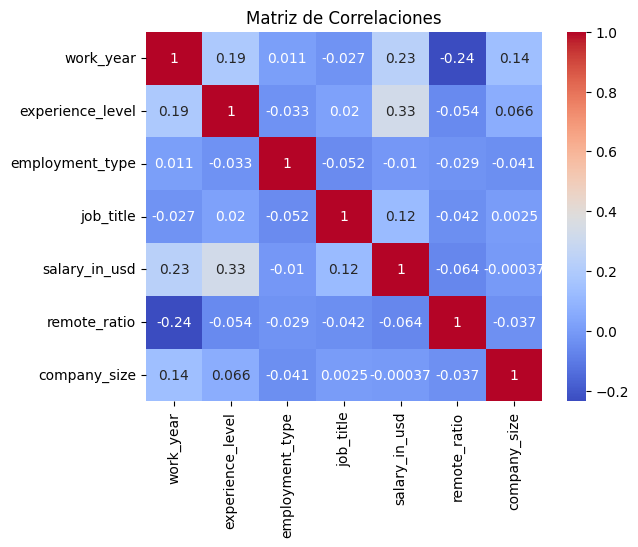

In [189]:
Correlation_matrix=data_encoded.corr()
sns.heatmap(Correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()

### Experience level and Salary in USD:

Text(0.5, 1.0, 'Experience vs Salary in USD')

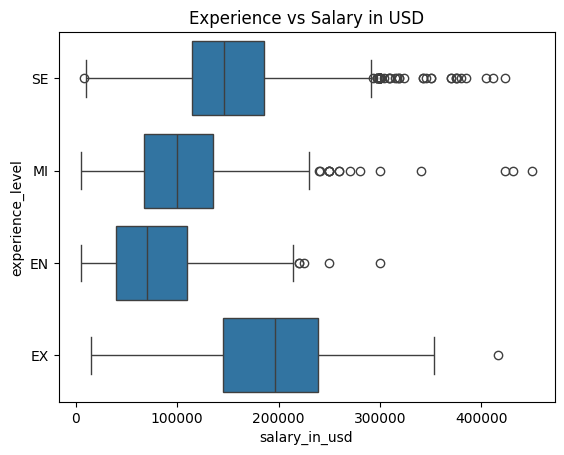

In [152]:
sns.boxplot(y=Data['experience_level'],x=Data['salary_in_usd'],orient='h')
plt.title('Experience vs Salary in USD')

## Localization of the employee vs company location:
We are going to use the library of geopandas to have an idea of location of empleoyees and companies.

In [153]:
# Crear un DataFrame desde value_counts
Empl_Counts = Data['employee_residence'].value_counts().reset_index()
Empl_Counts.columns = ['employee_residence', 'value']  # Renombrar columnas
print(Empl_Counts)


   employee_residence  value
0                  US   3004
1                  GB    167
2                  CA     85
3                  ES     80
4                  IN     71
..                ...    ...
73                 RS      1
74                 NZ      1
75                 MD      1
76                 LU      1
77                 MT      1

[78 rows x 2 columns]


In [154]:
# Crear un DataFrame desde value_counts
comp_Counts = Data['company_location'].value_counts().reset_index()
comp_Counts.columns = ['company_location', 'value1']  # Renombrar columnas
print(comp_Counts)

   company_location  value1
0                US    3040
1                GB     172
2                CA      87
3                ES      77
4                IN      58
..              ...     ...
67               CN       1
68               NZ       1
69               CL       1
70               MD       1
71               MT       1

[72 rows x 2 columns]


In [155]:
url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)
world.columns
print(world['ISO_A2'].unique())
print(Empl_Counts['employee_residence'].unique())


# Función para convertir ISO alpha-3 a alpha-2
def convert_to_alpha2(alpha3):
    try:
        return pycountry.countries.get(alpha_3=alpha3).alpha_2
    except AttributeError:
        return None

# Agregar columna con códigos ISO alpha-2 al GeoDataFrame
world['ISO_A2'] = world['SOV_A3'].apply(convert_to_alpha2)


['FJ' 'TZ' 'EH' 'CA' 'US' 'KZ' 'UZ' 'PG' 'ID' 'AR' 'CL' 'CD' 'SO' 'KE'
 'SD' 'TD' 'HT' 'DO' 'RU' 'BS' 'FK' '-99' 'GL' 'TF' 'TL' 'ZA' 'LS' 'MX'
 'UY' 'BR' 'BO' 'PE' 'CO' 'PA' 'CR' 'NI' 'HN' 'SV' 'GT' 'BZ' 'VE' 'GY'
 'SR' 'EC' 'PR' 'JM' 'CU' 'ZW' 'BW' 'NA' 'SN' 'ML' 'MR' 'BJ' 'NE' 'NG'
 'CM' 'TG' 'GH' 'CI' 'GN' 'GW' 'LR' 'SL' 'BF' 'CF' 'CG' 'GA' 'GQ' 'ZM'
 'MW' 'MZ' 'SZ' 'AO' 'BI' 'IL' 'LB' 'MG' 'PS' 'GM' 'TN' 'DZ' 'JO' 'AE'
 'QA' 'KW' 'IQ' 'OM' 'VU' 'KH' 'TH' 'LA' 'MM' 'VN' 'KP' 'KR' 'MN' 'IN'
 'BD' 'BT' 'NP' 'PK' 'AF' 'TJ' 'KG' 'TM' 'IR' 'SY' 'AM' 'SE' 'BY' 'UA'
 'PL' 'AT' 'HU' 'MD' 'RO' 'LT' 'LV' 'EE' 'DE' 'BG' 'GR' 'TR' 'AL' 'HR'
 'CH' 'LU' 'BE' 'NL' 'PT' 'ES' 'IE' 'NC' 'SB' 'NZ' 'AU' 'LK' 'CN' 'CN-TW'
 'IT' 'DK' 'GB' 'IS' 'AZ' 'GE' 'PH' 'MY' 'BN' 'SI' 'FI' 'SK' 'CZ' 'ER'
 'JP' 'PY' 'YE' 'SA' 'AQ' 'CY' 'MA' 'EG' 'LY' 'ET' 'DJ' 'UG' 'RW' 'BA'
 'MK' 'RS' 'ME' 'TT' 'SS']
['US' 'GB' 'CA' 'ES' 'IN' 'DE' 'FR' 'PT' 'BR' 'GR' 'NL' 'AU' 'MX' 'PK'
 'IT' 'IE' 'JP' 'NG' 'AR' 'AT' 'PL' 'BE' 'TR' 

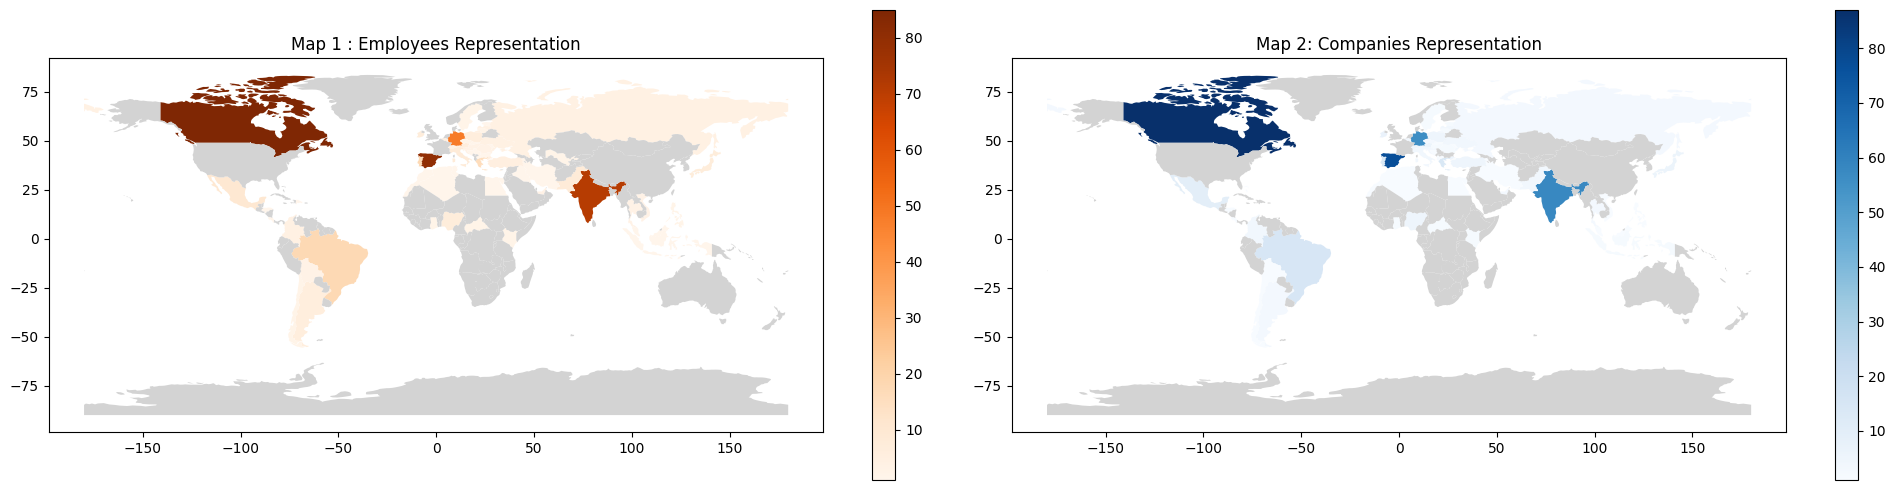

In [156]:
# Combinar datos con geometrías del GeoDataFrame
merged_emp = world.merge(Empl_Counts, how='left', left_on='ISO_A2', right_on='employee_residence')
merged_comp=world.merge(comp_Counts, how='left', left_on='ISO_A2', right_on='company_location')
# Crear la figura y los subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(20, 5))  # Ajusta figsize según sea necesario

# Primer mapa
merged_emp.plot(
    column='value',       
    cmap='Oranges',        
    legend=True,          
    missing_kwds={"color": "lightgrey", "label": "No data"},
    ax=axes[0]  # Especificamos el subplot donde se dibuja el primer mapa
)
axes[0].set_title("Map 1 : Employees Representation")

# Segundo mapa (puedes cambiar la columna o la paleta de colores)
merged_comp.plot(
    column='value1',       
    cmap='Blues',        
    legend=True,          
    missing_kwds={"color": "lightgrey", "label": "No data"},
    ax=axes[1]  # Especificamos el subplot donde se dibuja el segundo mapa
)
axes[1].set_title("Map 2: Companies Representation")

# Mostrar los gráficos
plt.tight_layout()
plt.show()
